<a href="https://colab.research.google.com/github/Uwimbabazi-Keza/alu-machine_learning/blob/main/Breast_Cancer_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Model 1 (without Optimization)

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf

In [66]:
#Load data and remove null values
df = pd.read_csv('data.csv')
df=df.dropna(axis=1)
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [67]:
#Define dependent variable (y) and replace diagnosis values with binary numbers
y = df["diagnosis"].values
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [68]:
#Define independent variable (x) and scale values to similar range
x = df.drop(labels = ["diagnosis", "id"], axis=1)

#scale
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s.fit(x)
x = s.transform(x)

In [69]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [70]:
#Create Model
from keras.models import Sequential
from keras.layers import Dense, Activation
model_1 = Sequential()
model_1.add(Dense(16, input_dim=30, activation='relu'))
model_1.add(Dense(1))
model_1.add(Activation("sigmoid"))
model_1.compile(loss="binary_crossentropy", metrics="accuracy")

In [71]:
history = model_1.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.6988 - accuracy: 0.3732 - val_loss: 0.6699 - val_accuracy: 0.3846
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6703 - accuracy: 0.4413 - val_loss: 0.6477 - val_accuracy: 0.4965
Epoch 3/100
7/7 [==============================] - 0s 6ms/step - loss: 0.6509 - accuracy: 0.5798 - val_loss: 0.6296 - val_accuracy: 0.6503
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 0.6342 - accuracy: 0.6925 - val_loss: 0.6127 - val_accuracy: 0.7692
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.6181 - accuracy: 0.7676 - val_loss: 0.5961 - val_accuracy: 0.8252
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6024 - accuracy: 0.8427 - val_loss: 0.5789 - val_accuracy: 0.8601
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5870 - accuracy: 0.8615 - val_loss: 0.5628 - val_accuracy: 0.8811
Epoch 8/100
7/7 [=======

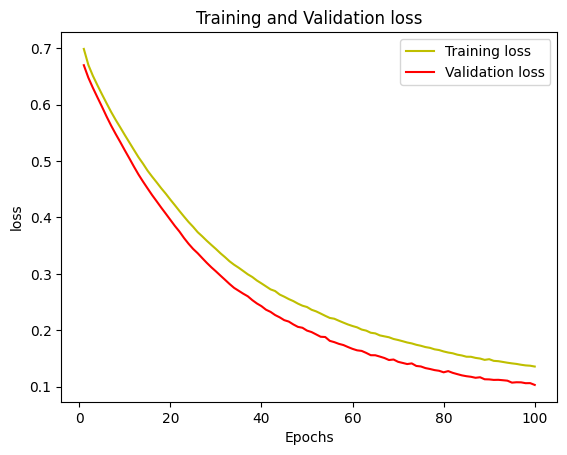

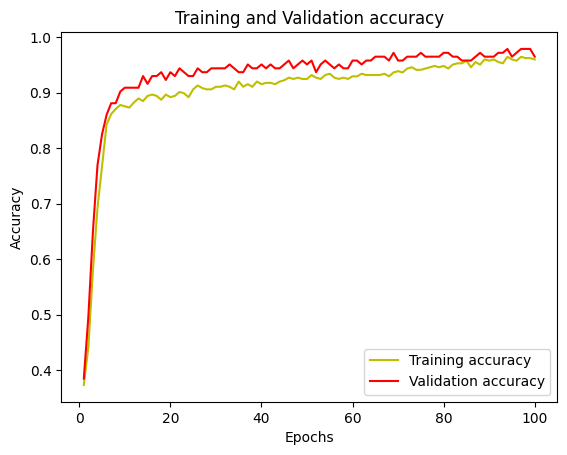

In [72]:
#Plot loss curves
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Plot loss curves for accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [73]:
#Predicting the Test set results
y_pred = model_1.predict(x_test)
y_pred = (y_pred > 0.5)

#confusion matrix
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(c)


5/5 [==============================] - 0s 2ms/step
Confusion Matrix:
[[88  1]
 [ 4 50]]


In [74]:
#Specificity
specificity = c[0, 0] / (c[0, 0] + c[0, 1])
print("Specificity (True Negative Rate):", specificity)

Specificity (True Negative Rate): 0.9887640449438202


In [75]:
#F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9523809523809523


In [76]:
#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.97        89
     Class 1       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



# Optimized Model

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l1, l2
from keras.optimizers import Adam

model_2 = Sequential()
model_2.add(Dense(16, input_dim=30, activation='relu', kernel_regularizer=l1(0.01)))
model_2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model_2.add(Dense(1))
model_2.add(Activation("sigmoid"))
model_2.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
print(model_2.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                496       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
 activation_6 (Activation)   (None, 1)                 0         
                                                                 
Total params: 785 (3.07 KB)
Trainable params: 785 (3.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/100
7/7 [==============================] - 1s 34ms/step - loss: 1.7689 - accuracy: 0.5188 - val_loss: 1.7397 - val_accuracy: 0.5245
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 1.7213 - accuracy: 0.6268 - val_loss: 1.6927 - val_accuracy: 0.6224
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1.6759 - accuracy: 0.6526 - val_loss: 1.6468 - val_accuracy: 0.6853
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 1.6317 - accuracy: 0.6784 - val_loss: 1.6024 - val_accuracy: 0.7273
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 1.5890 - accuracy: 0.7089 - val_loss: 1.5594 - val_accuracy: 0.7413
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 1.5479 - accuracy: 0.7394 - val_loss: 1.5178 - val_accuracy: 0.7692
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 1.5077 - accuracy: 0.7465 - val_loss: 1.4770 - val_accuracy: 0.7832
Epoch 8/100
7/7 [=========

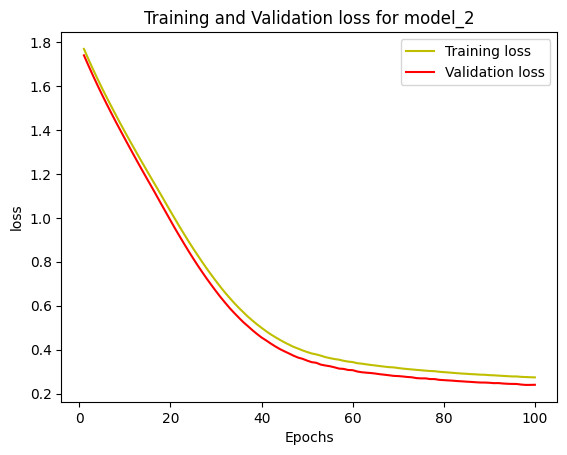

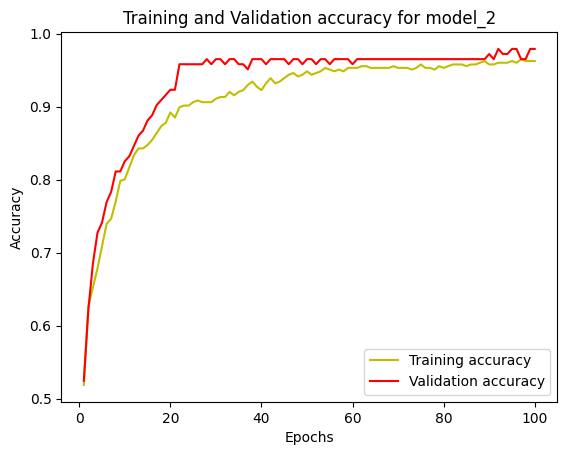

In [78]:
history_2 = model_2.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(x_test, y_test))

#Plot loss curves for model_2
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
epochs = range(1, len(loss_2) + 1)
plt.plot(epochs, loss_2, 'y', label='Training loss')
plt.plot(epochs, val_loss_2, 'r', label='Validation loss')
plt.title('Training and Validation loss for model_2')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Plot loss curves for accuracy for model_2
accuracy_2 = history_2.history['accuracy']
val_accuracy_2 = history_2.history['val_accuracy']
plt.plot(epochs, accuracy_2, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy_2, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy for model_2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [79]:
#Predicting the Test set results for model_2
y_pred_2 = model_2.predict(x_test)
y_pred_2 = (y_pred_2 > 0.5)

#confusion matrix for model_2
c_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:")
print(c_2)

5/5 [==============================] - 0s 2ms/step
Confusion Matrix:
[[88  1]
 [ 2 52]]


In [80]:
#Specificity
specificity = c_2[0, 0] / (c_2[0, 0] + c_2[0, 1])
print("Specificity (True Negative Rate):", specificity)

Specificity (True Negative Rate): 0.9887640449438202


In [81]:
#F1 Score
from sklearn.metrics import f1_score
f1_2 = f1_score(y_test, y_pred_2)
print("F1 Score for model 2:", f1_2)

F1 Score for model 2: 0.9719626168224299


In [82]:
#Classification Report
from sklearn.metrics import classification_report
print("Classification Report for model 2:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))


Classification Report for model 2:
              precision    recall  f1-score   support

     Class 0       0.96      0.99      0.97        89
     Class 1       0.98      0.93      0.95        54

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

